In [1]:
#!/usr/bin/env python
# coding: utf-8


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy import units as u
import sys
import pynbody
import healpy as hp
from healpy.newvisufunc import projview, newprojplot

sys.path.append("/mnt/home/ecunningham/python")
plt.style.use('~/matplotlib.mplstyle')
import gizmo_analysis as ga
import halo_analysis as halo
import nba

# 
import pynbody_routines  as pr 
import FIRE_analysis as fa
import plotting as pl

In [2]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)

In [3]:
def mollweide_projection(lpol, bpol, pos, subhalos, title, family, **kwargs):

    """
    Makes mollweide plot using healpix
    Parameters:
    ----------- 
    l : numpy.array
    b : numpy.array
    """
    plt.figure(figsize=(8, 4))
    plt.subplot(111, projection='mollweide')
    
    
    
    dark_subhalos = subhalos['star.mass']==-1
    satellites = subhalos['star.mass']!=-1
    
    
    dist_dm = np.sqrt(np.sum(pos[dark_subhalos]**2, axis=1))
    dist_cut_dm = np.where((dist_dm> 50) & (dist_dm< 300)) 
    
    
    dist_stars = np.sqrt(np.sum(pos[satellites]**2, axis=1))
    dist_cut_stars = np.where((dist_stars> 50) & (dist_stars< 300)) 
    
    subhalos_mass = subhalos['mass.peak'][dark_subhalos][dist_cut_dm]
    satellites_mass = subhalos['mass.peak'][satellites][dist_cut_stars]
    if family=='dm':
        plt.scatter(lpol[dark_subhalos][dist_cut_dm]*np.pi/180, bpol[dark_subhalos][dist_cut_dm]*np.pi/180,
                       alpha=0.6,  s=1, c='k')
    elif family=='stars':
        im = plt.scatter(lpol[satellites][dist_cut_stars]*np.pi/180, bpol[satellites][dist_cut_stars]*np.pi/180,
                    s=60, c=np.log10(satellites_mass), alpha=1, marker='*', cmap='Reds')
        cbar = plt.colorbar(im, orientation='horizontal', fraction=0.06)
        cbar.set_label(r'$\rm{Log_{10}\ Mpeak_{DM}}$')
    #plt.scatter(-100*np.pi/180, 70*np.pi/180, c='r', marker='*', s=80)
    plt.xticks([-np.pi*2/3, -np.pi*1/3., 0, np.pi*1/3., np.pi*2/3.], ['120', '60', '0', '300', '240'] )
    plt.yticks([-np.pi/2., -np.pi/4., 0, np.pi/4., np.pi/2.])
    #plt.xlabel('a', labelpad=20)
    plt.grid()
    if 'figname' in kwargs.keys():
        print("* Saving figure in ", kwargs['figname'])
        plt.savefig(kwargs['figname'], bbox_inches='tight')
        plt.close()
    return 0

In [10]:
snap_init = 300
snap_final = 470

sim='m12w'
figname = "test_projections"


# Halo catalogue

sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)
m12b_subhalos_300 = halo.io.IO.read_catalogs('snapshot', 300, sim_directory)
m12b_subhalos_385 = halo.io.IO.read_catalogs('snapshot', 385, sim_directory)
m12b_subhalos_449 = halo.io.IO.read_catalogs('snapshot', 449, sim_directory)

# Tree
halt = halo.io.IO.read_tree(simulation_directory=sim_directory)

#p0 = ga.io.Read.read_snapshots(['dark', 'star'], 'snapshot', 385, sim_directory, 
#                              assign_hosts=True, particle_subsample_factor=1)

subs_path = '/mnt/home/ecunningham/ceph/latte/m12b_res7100/massive_stream/dm_inds.npy'
subs_ids = np.load(subs_path)                                     
# load particle data



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 53954 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 53954 halos, 115 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/snapshot_times.txt

  using snapshot index = 385, redshift = 0.488

* read 49173 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100/halo/rockstar_dm/catalog_hdf5/halo_385.hdf5

# in halo_analysis.halo_io.Particle():
* read 49173 halos, 74 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12w_res7100

In [7]:
m12b_subhalos_300.keys()

dict_keys(['accrete.rate', 'accrete.rate.100Myr', 'accrete.rate.tdyn', 'am.phantom', 'am.progenitor.main', 'axis.b/a', 'axis.c/a', 'descendant.snapshot', 'host.distance', 'host.index', 'host.velocity', 'host.velocity.rad', 'host.velocity.tan', 'id', 'id.to.index', 'infall.first.mass', 'infall.first.snapshot', 'infall.first.vel.circ.max', 'infall.mass', 'infall.snapshot', 'infall.vel.circ.max', 'major.merger.snapshot', 'mass', 'mass.180m', 'mass.200c', 'mass.200m', 'mass.500c', 'mass.bound', 'mass.half.snapshot', 'mass.lowres', 'mass.peak', 'mass.peak.snapshot', 'mass.vir', 'position', 'position.offset', 'progenitor.number', 'radius', 'scale.radius', 'scale.radius.klypin', 'spin.bullock', 'spin.peebles', 'tree.index', 'vel.circ.max', 'vel.circ.peak', 'vel.std', 'velocity', 'velocity.offset', 'dark2.mass', 'star.form.time.100', 'star.form.time.50', 'star.form.time.90', 'star.form.time.95', 'star.form.time.dif.68', 'star.indices', 'star.mass', 'star.massfraction', 'star.number', 'star.pos

/tmp/ipykernel_212438/1291077184.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(m12b_subhalos_300['mass.peak']))


(array([5.042e+03, 2.161e+04, 9.154e+03, 3.376e+03, 9.840e+02, 2.590e+02,
        6.700e+01, 2.500e+01, 1.000e+00, 2.000e+00]),
 array([ 5.391458 ,  6.0294104,  6.667362 ,  7.305314 ,  7.9432664,
         8.581219 ,  9.219171 ,  9.857122 , 10.495075 , 11.133027 ,
        11.770979 ], dtype=float32),
 <BarContainer object of 10 artists>)

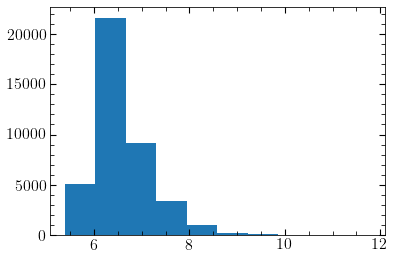

In [8]:
plt.hist(np.log10(m12b_subhalos_300['mass.peak']))

In [9]:
m12b_subhalos_300['star.mass']>0

array([False, False, False, ..., False, False, False])

In [10]:
times = '/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt'.format('m12b')
t_snap = np.loadtxt(times, usecols=3)

In [13]:
def compute_subhalos_OP(snap, sub, sim_directory):

    p = ga.io.Read.read_snapshots(['dark', 'star'], 'snapshot', snap_init, sim_directory, 
                              assign_hosts=True, particle_subsample_factor=1, sort_dark_by_id=True)

    # Removing subhalo particles
    #npart = len(p['dark'].prop('mass'))
    #mask_sub=np.ones(npart, dtype=bool)
    #mask_sub[subs_ids]=0            
    # Make pynbody halo
    #hfaceon = pr.pynbody_halo(p, mask_sub)
    #hsideon = pr.pynbody_halo(p, mask_sub)
    #pynbody.analysis.angmom.faceon(hfaceon, cen=(0,0,0))
    #pynbody.analysis.angmom.sideon(hsideon, cen=(0,0,0))


    #subhalos

    hsub = pr.pynbody_subhalos(sub)
    hsub_faceon = pr.pynbody_subhalos(sub)

    # Satellite orbit
    #sat_id = np.argsort(hsub.dark['mass'])[-2]
    #sat_tree_id = m12b_subhalos['tree.index'][sat_id]
    #satellite = fa.return_tracked_pos(halt, sat_tree_id, pynbody_halo=True)
    #satellite_faceon = satellite


    h_rotations = pr.pynbody_halo(p)
    faceon, edgeon = pr.make_pynbody_rotations(h_rotations)

    pynbody.transformation.transform(hsub_faceon, faceon)

    #pynbody.transformation.transform(satellite_faceon, faceon)

    #multipanel_plot(hfaceon, hsideon, satellite_faceon, k, figname)

    pos_dm = hsub_faceon.dark['pos']
    f = 1* (u.km/u.s).to(u.kpc/u.Gyr)
    vel_dm = hsub_faceon.dark['vel']*f


    dm_kinematics = nba.kinematics.Kinematics(pos_dm,  vel_dm)
    dm_OP_l_host, dm_OP_b_host = dm_kinematics.orbpole()


    #sat_kinematics = nba.kinematics.Kinematics(satellite_faceon.dark['pos'],  satellite_faceon.dark['vel'])
    #sat_l_host, sat_b_host = sat_kinematics.pos_cartesian_to_galactic()
    #sat_OP_l_host, sat_OP_b_host = sat_kinematics.orbpole()
    return dm_OP_l_host, dm_OP_b_host, pos_dm
   

In [12]:
l_300, b_300, pos_300 = compute_subhalos_OP(300, m12b_subhalos_300)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (id = 2): 6750970 particles
    gas       (id = 0): 66706907 particles
    star      (id = 4): 8052512 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_300.0.hdf5
    snapshot_300.1.hdf5
    snapshot_300.2.hdf5
    snapshot_300.3.hdf5
    snapshot_300.4.hdf5
    snapshot_300.5.hdf5
    snapshot_300.6.hdf5
    snapshot_300.7.hdf5

* reading cosmological parameters from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/initial_condition/ic_agora_m12b.conf

* sorting the following d

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


In [32]:
l_385, b_385, pos_385 = compute_subhalos_OP(385, m12b_subhalos_385)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (id = 2): 6750970 particles
    gas       (id = 0): 66706907 particles
    star      (id = 4): 8052512 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_300.0.hdf5
    snapshot_300.1.hdf5
    snapshot_300.2.hdf5
    snapshot_300.3.hdf5
    snapshot_300.4.hdf5
    snapshot_300.5.hdf5
    snapshot_300.6.hdf5
    snapshot_300.7.hdf5

* reading cosmological parameters from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/initial_condition/ic_agora_m12b.conf

* sorting the following d

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


In [ ]:
l_449, b_449, pos_449 = compute_subhalos_OP(449, m12b_subhalos_449)

In [14]:
mollweide_projection(l_300, b_300, pos_300, m12b_subhalos_300, '', family='dm', figname='../plots/exploration/subhalos_dark_mollweide_poles_300.png')

* Saving figure in  ../plots/exploration/subhalos_dark_mollweide_poles_300.png


0

In [131]:
mollweide_projection(-l_300, b_300, pos_300, m12b_subhalos_300, '', family='stars', figname='../plots/exploration/subhalos_stars_mollweide_poles_300.png')

/tmp/ipykernel_787480/4201285878.py:33: RuntimeWarning: invalid value encountered in log10
  s=60, c=np.log10(satellites_mass), alpha=1, marker='*', cmap='Reds')


* Saving figure in  ../plots/exploration/subhalos_stars_mollweide_poles_300.png


0

In [136]:
mollweide_projection(-l_385, b_385, pos_385, m12b_subhalos_385, '', family='dm', figname='../plots/exploration/subhalos_dark_mollweide_poles_385.png')

* Saving figure in  ../plots/exploration/subhalos_dark_mollweide_poles_385.png


0

In [137]:
mollweide_projection(-l_385, b_385, pos_385, m12b_subhalos_385, '', family='stars', figname='../plots/exploration/subhalos_stars_mollweide_poles_385.png')

* Saving figure in  ../plots/exploration/subhalos_stars_mollweide_poles_385.png


0

In [138]:
mollweide_projection(-l_449, b_449, pos_449, m12b_subhalos_449, '', family='dm', figname='../plots/exploration/subhalos_dark_mollweide_poles_449.png')

* Saving figure in  ../plots/exploration/subhalos_dark_mollweide_poles_449.png


0

In [139]:
mollweide_projection(-l_449, b_449, pos_449, m12b_subhalos_449, '', family='stars', figname='../plots/exploration/subhalos_stars_mollweide_poles_449.png')

/tmp/ipykernel_787480/4201285878.py:33: RuntimeWarning: invalid value encountered in log10
  s=60, c=np.log10(satellites_mass), alpha=1, marker='*', cmap='Reds')


* Saving figure in  ../plots/exploration/subhalos_stars_mollweide_poles_449.png


0

In [12]:
def mollweide_projection2(l, b, l2, b2, title, bmin, bmax, nside,  smooth=5, **kwargs):

    """
    Makes mollweide plot using healpix
    Parameters:
    ----------- 
    l : numpy.array
    b : numpy.array
    """
 
    
    mwlmc_indices = hp.ang2pix(nside,  (90-b)*np.pi/180., l*np.pi/180.)
    npix = hp.nside2npix(nside)
 
    idx, counts = np.unique(mwlmc_indices, return_counts=True)
    degsq = hp.nside2pixarea(nside, degrees=True)
    # fill the fullsky map
    hpx_map = np.zeros(npix, dtype=int)
    hpx_map[idx] = counts/degsq
    map_smooth = hp.smoothing(hpx_map, fwhm=smooth*np.pi/180)
    
  
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.close()
    projview(
        map_smooth,
        coord=["G"],
        graticule=True,
        graticule_labels=True,
        rot=(0, 0, 0),
        unit=" ",
        xlabel="Galactic Longitude (l) ",
        ylabel="Galactic Latitude (b)",
        cb_orientation="horizontal",
        min=bmin,
        max=bmax,
        latitude_grid_spacing=45,
        projection_type="mollweide",
        cmap='Greys',
        title=title,)
    newprojplot(theta=np.radians(90-(b2)), phi=np.radians(l2), marker="*", color="r", markersize=10, lw=0)
    if 'figname' in kwargs.keys():
        print("* Saving figure in ", kwargs['figname'])
        plt.savefig(kwargs['figname'], bbox_inches='tight', dpi=300)
        plt.close()
    return ax

In [20]:
d_300 = np.sqrt(np.sum(pos_300[~np.isnan(l_300)]**2, axis=1))
d_cut = np.where((d_300 > 50) &  (d_300 < 300))

In [21]:
dark_subhalos = m12b_subhalos_300['star.mass'][d_cut]==-1
stellar_subhalos = m12b_subhalos_300['star.mass'][d_cut]!=-1


In [28]:
mollweide_projection2(l_300[~np.isnan(b_300)][d_cut][dark_subhalos], b_300[~np.isnan(b_300)][d_cut][dark_subhalos],
                      l_300[~np.isnan(b_300)][d_cut][stellar_subhalos], b_300[~np.isnan(b_300)][d_cut][stellar_subhalos], 
                     title="", bmin=0, bmax=1,
                     nside=90, smooth=2, figname='../plots/exploration/m12b_subhalos_OP_mollweide_300.png')

* Saving figure in  ../plots/exploration/m12b_subhalos_OP_mollweide_300.png


<AxesSubplot:>

In [34]:
d_385 = np.sqrt(np.sum(pos_385[~np.isnan(l_385)]**2, axis=1))
d_cut1 = np.where((d_385 > 50) &  (d_385 < 300))
d_cut2 = np.where((d_385 > 300) &  (d_385 < 600))

In [35]:
dark_subhalos1 = m12b_subhalos_385['star.mass'][d_cut1]==-1
stellar_subhalos1 = m12b_subhalos_385['star.mass'][d_cut1]!=-1

dark_subhalos2 = m12b_subhalos_385['star.mass'][d_cut2]==-1
stellar_subhalos2 = m12b_subhalos_385['star.mass'][d_cut2]!=-1

In [36]:
mollweide_projection2(l_385[~np.isnan(b_385)][d_cut1][dark_subhalos1], b_385[~np.isnan(b_385)][d_cut1][dark_subhalos1],
                      l_385[~np.isnan(b_385)][d_cut1][stellar_subhalos1], b_385[~np.isnan(b_385)][d_cut1][stellar_subhalos1], 
                     title="", bmin=0, bmax=1,
                     nside=90, smooth=2, figname='../plots/exploration/m12b_subhalos_OP_mollweide_50_300_385.png')

* Saving figure in  ../plots/exploration/m12b_subhalos_OP_mollweide_50_300_385.png


<AxesSubplot:>

In [42]:
mollweide_projection2(l_385[~np.isnan(b_385)][d_cut2][dark_subhalos2], b_385[~np.isnan(b_385)][d_cut2][dark_subhalos2],
                      l_385[~np.isnan(b_385)][d_cut2][stellar_subhalos2], b_385[~np.isnan(b_385)][d_cut2][stellar_subhalos2], 
                     title="", bmin=0, bmax=1,
                     nside=90, smooth=2, figname='../plots/exploration/m12b_subhalos_OP_mollweide_300_600_385.png')

* Saving figure in  ../plots/exploration/m12b_subhalos_OP_mollweide_300_600_385.png


<AxesSubplot:>

In [271]:
d_449 = np.sqrt(np.sum(pos_449[~np.isnan(l_449)]**2, axis=1))
d_cut = np.where((d_449 > 50) &  (d_449 < 300))

In [273]:
dark_subhalos = m12b_subhalos_449['star.mass'][d_cut]==-1
stellar_subhalos = m12b_subhalos_449['star.mass'][d_cut]!=-1


In [274]:
mollweide_projection2(l_449[~np.isnan(b_449)][d_cut][dark_subhalos], b_449[~np.isnan(b_449)][d_cut][dark_subhalos],
                      l_449[~np.isnan(b_449)][d_cut][stellar_subhalos], b_449[~np.isnan(b_449)][d_cut][stellar_subhalos], 
                     title="", bmin=0, bmax=1,
                     nside=90, smooth=2, figname='../plots/exploration/m12b_subhalos_OP_mollweide_449.png')

* Saving figure in  ../plots/exploration/m12b_subhalos_OP_mollweide_449.png


<AxesSubplot:>

In [21]:
sim='m12b'
snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
times = np.loadtxt(snap_times, usecols=3)

sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)
# Tree
halt = halo.io.IO.read_tree(simulation_directory=sim_directory)




# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

* read 19882039 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5



In [38]:
for k in range(300, 601):
#for k in [300, 385, 450]:
    m12_subhalos = halo.io.IO.read_catalogs('snapshot', k, sim_directory)
    l, b, pos = compute_subhalos_OP(k, m12_subhalos, sim_directory)
    dist = np.sqrt(np.sum(pos[~np.isnan(l)]**2, axis=1))
    d_cut1 = np.where((dist > 50) &  (dist < 300))
    d_cut2 = np.where((dist > 300) &  (dist < 600))
    dark_subhalos1 = m12_subhalos['star.mass'][d_cut1]==-1
    stellar_subhalos1 = m12_subhalos['star.mass'][d_cut1]!=-1
    
    dark_subhalos2 = m12_subhalos['star.mass'][d_cut2]==-1
    stellar_subhalos2 = m12_subhalos['star.mass'][d_cut2]!=-1
    
    
    
    
    mollweide_projection2(l[~np.isnan(b)][d_cut1][dark_subhalos1], b[~np.isnan(b)][d_cut1][dark_subhalos1],
                      l[~np.isnan(b)][d_cut1][stellar_subhalos1], b[~np.isnan(b)][d_cut1][stellar_subhalos1], 
                     title=r"$t={:.2f}$\ Gyr".format(times[k]), bmin=0, bmax=1,
                     nside=90, smooth=2, figname='../plots/{}/{}_subhalos_OP_mollweide_50_300_{:03d}.png'.format(sim, sim, k))
    
    mollweide_projection2(l[~np.isnan(b)][d_cut2][dark_subhalos2], b[~np.isnan(b)][d_cut2][dark_subhalos2],
                      l[~np.isnan(b)][d_cut2][stellar_subhalos2], b[~np.isnan(b)][d_cut2][stellar_subhalos2], 
                     title=r"$t={:.2f}$\ Gyr".format(times[k]), bmin=0, bmax=1,
                     nside=90, smooth=2, figname='../plots/{}/{}_subhalos_OP_mollweide_300_600_{:03d}.png'.format(sim, sim, k))


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 51054 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 51054 halos, 96 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_300.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_300.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 301, redshift = 0.858

* read 50992 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_301.hdf5

# in halo_analysis.halo_io.Particle():
* read 50992 halos, 99 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_301.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_301.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_301.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 302, redshift = 0.853

* read 51008 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_302.hdf5

# in halo_analysis.halo_io.Particle():
* read 51008 halos, 88 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_302.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_302.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_302.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 303, redshift = 0.847

* read 50864 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_303.hdf5

# in halo_analysis.halo_io.Particle():
* read 50864 halos, 93 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_303.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_303.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_303.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 304, redshift = 0.842

* read 50748 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_304.hdf5

# in halo_analysis.halo_io.Particle():
* read 50748 halos, 98 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_304.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_304.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_304.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 305, redshift = 0.836

* read 50669 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_305.hdf5

# in halo_analysis.halo_io.Particle():
* read 50669 halos, 89 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_305.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_305.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_305.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 306, redshift = 0.831

* read 50634 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_306.hdf5

# in halo_analysis.halo_io.Particle():
* read 50634 halos, 98 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_306.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_306.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_306.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 307, redshift = 0.826

* read 50482 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_307.hdf5

# in halo_analysis.halo_io.Particle():
* read 50482 halos, 91 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_307.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_307.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_307.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 308, redshift = 0.820

* read 50562 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_308.hdf5

# in halo_analysis.halo_io.Particle():
* read 50562 halos, 94 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_308.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_308.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_308.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 309, redshift = 0.815

* read 50437 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_309.hdf5

# in halo_analysis.halo_io.Particle():
* read 50437 halos, 85 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_309.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_309.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_309.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 310, redshift = 0.810

* read 50112 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_310.hdf5

# in halo_analysis.halo_io.Particle():
* read 50112 halos, 96 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_310.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_310.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_310.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 311, redshift = 0.805

* read 50122 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_311.hdf5

# in halo_analysis.halo_io.Particle():
* read 50122 halos, 87 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_311.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_311.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_311.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 312, redshift = 0.799

* read 50036 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_312.hdf5

# in halo_analysis.halo_io.Particle():
* read 50036 halos, 85 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_312.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_312.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_312.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 313, redshift = 0.794

* read 50084 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_313.hdf5

# in halo_analysis.halo_io.Particle():
* read 50084 halos, 91 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_313.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_313.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_313.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 314, redshift = 0.789

* read 49903 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_314.hdf5

# in halo_analysis.halo_io.Particle():
* read 49903 halos, 95 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_314.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_314.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_314.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 315, redshift = 0.784

* read 50136 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_315.hdf5

# in halo_analysis.halo_io.Particle():
* read 50136 halos, 91 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_315.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_315.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_315.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 316, redshift = 0.779

* read 49992 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_316.hdf5

# in halo_analysis.halo_io.Particle():
* read 49992 halos, 85 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_316.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_316.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_316.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 317, redshift = 0.774

* read 49991 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_317.hdf5

# in halo_analysis.halo_io.Particle():
* read 49991 halos, 91 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_317.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_317.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_317.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 318, redshift = 0.769

* read 49982 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_318.hdf5

# in halo_analysis.halo_io.Particle():
* read 49982 halos, 94 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_318.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_318.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_318.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 319, redshift = 0.764

* read 49951 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_319.hdf5

# in halo_analysis.halo_io.Particle():
* read 49951 halos, 85 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_319.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_319.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_319.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 320, redshift = 0.759

* read 49777 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_320.hdf5

# in halo_analysis.halo_io.Particle():
* read 49777 halos, 96 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_320.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_320.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_320.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 321, redshift = 0.754

* read 49856 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_321.hdf5

# in halo_analysis.halo_io.Particle():
* read 49856 halos, 94 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_321.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_321.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_321.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 322, redshift = 0.749

* read 49573 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_322.hdf5

# in halo_analysis.halo_io.Particle():
* read 49573 halos, 81 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_322.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_322.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_322.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 323, redshift = 0.744

* read 49533 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_323.hdf5

# in halo_analysis.halo_io.Particle():
* read 49533 halos, 80 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_323.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_323.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_323.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 324, redshift = 0.740

* read 49549 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_324.hdf5

# in halo_analysis.halo_io.Particle():
* read 49549 halos, 78 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_324.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_324.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_324.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 325, redshift = 0.735

* read 49557 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_325.hdf5

# in halo_analysis.halo_io.Particle():
* read 49557 halos, 92 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_325.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_325.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_325.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 326, redshift = 0.730

* read 49488 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_326.hdf5

# in halo_analysis.halo_io.Particle():
* read 49488 halos, 80 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_326.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_326.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_326.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 327, redshift = 0.725

* read 49538 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_327.hdf5

# in halo_analysis.halo_io.Particle():
* read 49538 halos, 80 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_327.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_327.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_327.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 328, redshift = 0.721

* read 49379 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_328.hdf5

# in halo_analysis.halo_io.Particle():
* read 49379 halos, 84 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_328.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_328.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_328.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 329, redshift = 0.716

* read 49360 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_329.hdf5

# in halo_analysis.halo_io.Particle():
* read 49360 halos, 82 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_329.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_329.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_329.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 330, redshift = 0.711

* read 49267 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_330.hdf5

# in halo_analysis.halo_io.Particle():
* read 49267 halos, 90 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_330.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_330.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_330.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 331, redshift = 0.707

* read 49254 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_331.hdf5

# in halo_analysis.halo_io.Particle():
* read 49254 halos, 76 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_331.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_331.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_331.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 332, redshift = 0.702

* read 49068 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_332.hdf5

# in halo_analysis.halo_io.Particle():
* read 49068 halos, 77 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_332.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_332.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_332.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 333, redshift = 0.697

* read 49283 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_333.hdf5

# in halo_analysis.halo_io.Particle():
* read 49283 halos, 80 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_333.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_333.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_333.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 334, redshift = 0.693

* read 49124 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_334.hdf5

# in halo_analysis.halo_io.Particle():
* read 49124 halos, 89 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_334.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_334.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_334.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 335, redshift = 0.688

* read 48960 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_335.hdf5

# in halo_analysis.halo_io.Particle():
* read 48960 halos, 77 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_335.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_335.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_335.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 336, redshift = 0.684

* read 48846 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_336.hdf5

# in halo_analysis.halo_io.Particle():
* read 48846 halos, 80 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_336.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_336.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_336.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 337, redshift = 0.679

* read 48714 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_337.hdf5

# in halo_analysis.halo_io.Particle():
* read 48714 halos, 78 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_337.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_337.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_337.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 338, redshift = 0.675

* read 48695 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_338.hdf5

# in halo_analysis.halo_io.Particle():
* read 48695 halos, 78 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_338.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_338.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_338.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 339, redshift = 0.670

* read 48704 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_339.hdf5

# in halo_analysis.halo_io.Particle():
* read 48704 halos, 86 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_339.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_339.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_339.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 340, redshift = 0.666

* read 48487 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_340.hdf5

# in halo_analysis.halo_io.Particle():
* read 48487 halos, 79 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_340.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_340.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_340.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 341, redshift = 0.661

* read 48525 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_341.hdf5

# in halo_analysis.halo_io.Particle():
* read 48525 halos, 78 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_341.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_341.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_341.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 342, redshift = 0.657

* read 48795 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_342.hdf5

# in halo_analysis.halo_io.Particle():
* read 48795 halos, 88 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_342.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_342.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_342.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 343, redshift = 0.653

* read 48679 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_343.hdf5

# in halo_analysis.halo_io.Particle():
* read 48679 halos, 81 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_343.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_343.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_343.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 344, redshift = 0.648

* read 48617 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_344.hdf5

# in halo_analysis.halo_io.Particle():
* read 48617 halos, 81 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_344.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_344.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_344.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 345, redshift = 0.644

* read 48597 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_345.hdf5

# in halo_analysis.halo_io.Particle():
* read 48597 halos, 78 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_345.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_345.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_345.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 346, redshift = 0.640

* read 48581 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_346.hdf5

# in halo_analysis.halo_io.Particle():
* read 48581 halos, 78 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_346.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_346.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_346.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 347, redshift = 0.635

* read 48420 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_347.hdf5

# in halo_analysis.halo_io.Particle():
* read 48420 halos, 85 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_347.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_347.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_347.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 348, redshift = 0.631

* read 48358 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_348.hdf5

# in halo_analysis.halo_io.Particle():
* read 48358 halos, 74 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_348.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_348.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_348.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 349, redshift = 0.627

* read 48222 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_349.hdf5

# in halo_analysis.halo_io.Particle():
* read 48222 halos, 83 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_349.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_349.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_349.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 350, redshift = 0.623

* read 48201 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_350.hdf5

# in halo_analysis.halo_io.Particle():
* read 48201 halos, 81 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_350.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_350.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_350.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 351, redshift = 0.619

* read 48136 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_351.hdf5

# in halo_analysis.halo_io.Particle():
* read 48136 halos, 77 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_351.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_351.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_351.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 352, redshift = 0.614

* read 48166 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_352.hdf5

# in halo_analysis.halo_io.Particle():
* read 48166 halos, 84 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_352.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_352.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_352.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 353, redshift = 0.610

* read 48245 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_353.hdf5

# in halo_analysis.halo_io.Particle():
* read 48245 halos, 79 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_353.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_353.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_353.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 354, redshift = 0.606

* read 48089 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_354.hdf5

# in halo_analysis.halo_io.Particle():
* read 48089 halos, 75 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_354.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_354.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_354.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 355, redshift = 0.602

* read 48010 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_355.hdf5

# in halo_analysis.halo_io.Particle():
* read 48010 halos, 74 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_355.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_355.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_355.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 356, redshift = 0.598

* read 47865 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_356.hdf5

# in halo_analysis.halo_io.Particle():
* read 47865 halos, 75 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_356.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_356.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_356.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 357, redshift = 0.594

* read 47817 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_357.hdf5

# in halo_analysis.halo_io.Particle():
* read 47817 halos, 74 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_357.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_357.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_357.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 358, redshift = 0.590

* read 47815 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_358.hdf5

# in halo_analysis.halo_io.Particle():
* read 47815 halos, 73 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_358.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_358.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_358.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 359, redshift = 0.586

* read 47831 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_359.hdf5

# in halo_analysis.halo_io.Particle():
* read 47831 halos, 80 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_359.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_359.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_359.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 360, redshift = 0.582

* read 47580 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_360.hdf5

# in halo_analysis.halo_io.Particle():
* read 47580 halos, 83 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_360.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_360.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_360.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 361, redshift = 0.578

* read 47576 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_361.hdf5

# in halo_analysis.halo_io.Particle():
* read 47576 halos, 84 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_361.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_361.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_361.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 362, redshift = 0.574

* read 47445 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_362.hdf5

# in halo_analysis.halo_io.Particle():
* read 47445 halos, 84 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_362.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_362.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_362.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 363, redshift = 0.570

* read 47432 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_363.hdf5

# in halo_analysis.halo_io.Particle():
* read 47432 halos, 83 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_363.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_363.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_363.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 364, redshift = 0.566

* read 47505 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_364.hdf5

# in halo_analysis.halo_io.Particle():
* read 47505 halos, 71 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_364.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_364.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_364.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 365, redshift = 0.562

* read 47362 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_365.hdf5

# in halo_analysis.halo_io.Particle():
* read 47362 halos, 70 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_365.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_365.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_365.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 366, redshift = 0.558

* read 47452 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_366.hdf5

# in halo_analysis.halo_io.Particle():
* read 47452 halos, 72 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_366.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_366.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_366.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 367, redshift = 0.554

* read 47368 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_367.hdf5

# in halo_analysis.halo_io.Particle():
* read 47368 halos, 78 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_367.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_367.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_367.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 368, redshift = 0.551

* read 47301 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_368.hdf5

# in halo_analysis.halo_io.Particle():
* read 47301 halos, 76 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_368.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_368.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_368.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 369, redshift = 0.547

* read 46976 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_369.hdf5

# in halo_analysis.halo_io.Particle():
* read 46976 halos, 68 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_369.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_369.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_369.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 370, redshift = 0.543

* read 46914 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_370.hdf5

# in halo_analysis.halo_io.Particle():
* read 46914 halos, 76 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_370.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_370.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_370.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 371, redshift = 0.539

* read 46994 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_371.hdf5

# in halo_analysis.halo_io.Particle():
* read 46994 halos, 68 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_371.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_371.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_371.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 372, redshift = 0.535

* read 46968 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_372.hdf5

# in halo_analysis.halo_io.Particle():
* read 46968 halos, 69 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_372.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_372.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_372.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 373, redshift = 0.532

* read 46825 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_373.hdf5

# in halo_analysis.halo_io.Particle():
* read 46825 halos, 72 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_373.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_373.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_373.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 374, redshift = 0.528

* read 46856 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_374.hdf5

# in halo_analysis.halo_io.Particle():
* read 46856 halos, 76 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_374.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_374.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_374.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 375, redshift = 0.524

* read 46722 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_375.hdf5

# in halo_analysis.halo_io.Particle():
* read 46722 halos, 68 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_375.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_375.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_375.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 376, redshift = 0.521

* read 46713 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_376.hdf5

# in halo_analysis.halo_io.Particle():
* read 46713 halos, 66 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_376.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_376.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_376.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 377, redshift = 0.517

* read 46644 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_377.hdf5

# in halo_analysis.halo_io.Particle():
* read 46644 halos, 73 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_377.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_377.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_377.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 378, redshift = 0.513

* read 46556 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_378.hdf5

# in halo_analysis.halo_io.Particle():
* read 46556 halos, 73 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_378.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_378.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_378.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 379, redshift = 0.510

* read 46490 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_379.hdf5

# in halo_analysis.halo_io.Particle():
* read 46490 halos, 73 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_379.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_379.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_379.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 380, redshift = 0.506

* read 46789 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_380.hdf5

# in halo_analysis.halo_io.Particle():
* read 46789 halos, 67 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_380.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_380.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_380.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 381, redshift = 0.502

* read 46671 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_381.hdf5

# in halo_analysis.halo_io.Particle():
* read 46671 halos, 64 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_381.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_381.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_381.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 382, redshift = 0.499

* read 46727 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_382.hdf5

# in halo_analysis.halo_io.Particle():
* read 46727 halos, 66 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_382.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_382.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_382.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 383, redshift = 0.495

* read 46479 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_383.hdf5

# in halo_analysis.halo_io.Particle():
* read 46479 halos, 67 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_383.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_383.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_383.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 384, redshift = 0.492

* read 46508 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_384.hdf5

# in halo_analysis.halo_io.Particle():
* read 46508 halos, 65 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_384.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_384.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_384.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 385, redshift = 0.488

* read 46261 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_385.hdf5

# in halo_analysis.halo_io.Particle():
* read 46261 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_385.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_385.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_385.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 386, redshift = 0.485

* read 46469 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_386.hdf5

# in halo_analysis.halo_io.Particle():
* read 46469 halos, 65 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_386.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_386.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_386.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 387, redshift = 0.481

* read 46238 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_387.hdf5

# in halo_analysis.halo_io.Particle():
* read 46238 halos, 70 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_387.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_387.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_387.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 388, redshift = 0.478

* read 46211 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_388.hdf5

# in halo_analysis.halo_io.Particle():
* read 46211 halos, 64 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_388.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_388.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_388.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 389, redshift = 0.474

* read 46143 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_389.hdf5

# in halo_analysis.halo_io.Particle():
* read 46143 halos, 64 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_389.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_389.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_389.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 390, redshift = 0.471

* read 46221 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_390.hdf5

# in halo_analysis.halo_io.Particle():
* read 46221 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_390.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_390.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_390.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 391, redshift = 0.467

* read 46107 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_391.hdf5

# in halo_analysis.halo_io.Particle():
* read 46107 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_391.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_391.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_391.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 392, redshift = 0.464

* read 46126 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_392.hdf5

# in halo_analysis.halo_io.Particle():
* read 46126 halos, 68 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_392.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_392.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_392.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 393, redshift = 0.460

* read 46001 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_393.hdf5

# in halo_analysis.halo_io.Particle():
* read 46001 halos, 66 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_393.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_393.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_393.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 394, redshift = 0.457

* read 45955 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_394.hdf5

# in halo_analysis.halo_io.Particle():
* read 45955 halos, 61 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_394.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_394.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_394.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 395, redshift = 0.454

* read 45898 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_395.hdf5

# in halo_analysis.halo_io.Particle():
* read 45898 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_395.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_395.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_395.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 396, redshift = 0.450

* read 45688 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_396.hdf5

# in halo_analysis.halo_io.Particle():
* read 45688 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_396.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_396.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_396.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 397, redshift = 0.447

* read 45704 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_397.hdf5

# in halo_analysis.halo_io.Particle():
* read 45704 halos, 65 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_397.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_397.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_397.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 398, redshift = 0.444

* read 45548 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_398.hdf5

# in halo_analysis.halo_io.Particle():
* read 45548 halos, 67 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_398.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_398.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_398.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 399, redshift = 0.440

* read 45532 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_399.hdf5

# in halo_analysis.halo_io.Particle():
* read 45532 halos, 65 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_399.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_399.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_399.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 400, redshift = 0.437

* read 45502 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_400.hdf5

# in halo_analysis.halo_io.Particle():
* read 45502 halos, 70 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_400.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_400.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_400.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 401, redshift = 0.434

* read 45557 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_401.hdf5

# in halo_analysis.halo_io.Particle():
* read 45557 halos, 65 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_401.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_401.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_401.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 402, redshift = 0.431

* read 45415 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_402.hdf5

# in halo_analysis.halo_io.Particle():
* read 45415 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_402.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_402.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_402.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 403, redshift = 0.427

* read 45298 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_403.hdf5

# in halo_analysis.halo_io.Particle():
* read 45298 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_403.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_403.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_403.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 404, redshift = 0.424

* read 45375 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_404.hdf5

# in halo_analysis.halo_io.Particle():
* read 45375 halos, 61 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_404.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_404.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_404.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 405, redshift = 0.421

* read 45524 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_405.hdf5

# in halo_analysis.halo_io.Particle():
* read 45524 halos, 68 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_405.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_405.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_405.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 406, redshift = 0.418

* read 45399 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_406.hdf5

# in halo_analysis.halo_io.Particle():
* read 45399 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_406.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_406.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_406.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 407, redshift = 0.414

* read 45251 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_407.hdf5

# in halo_analysis.halo_io.Particle():
* read 45251 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_407.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_407.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_407.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 408, redshift = 0.411

* read 45187 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_408.hdf5

# in halo_analysis.halo_io.Particle():
* read 45187 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_408.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_408.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_408.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 409, redshift = 0.408

* read 45259 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_409.hdf5

# in halo_analysis.halo_io.Particle():
* read 45259 halos, 61 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_409.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_409.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_409.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 410, redshift = 0.405

* read 45327 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_410.hdf5

# in halo_analysis.halo_io.Particle():
* read 45327 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_410.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_410.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_410.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 411, redshift = 0.402

* read 45151 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_411.hdf5

# in halo_analysis.halo_io.Particle():
* read 45151 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_411.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_411.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_411.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 412, redshift = 0.399

* read 45166 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_412.hdf5

# in halo_analysis.halo_io.Particle():
* read 45166 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_412.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_412.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_412.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 413, redshift = 0.396

* read 45100 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_413.hdf5

# in halo_analysis.halo_io.Particle():
* read 45100 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_413.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_413.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_413.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 414, redshift = 0.392

* read 44995 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_414.hdf5

# in halo_analysis.halo_io.Particle():
* read 44995 halos, 64 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_414.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_414.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_414.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 415, redshift = 0.389

* read 44968 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_415.hdf5

# in halo_analysis.halo_io.Particle():
* read 44968 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_415.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_415.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_415.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 416, redshift = 0.386

* read 44936 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_416.hdf5

# in halo_analysis.halo_io.Particle():
* read 44936 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_416.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_416.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_416.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 417, redshift = 0.383

* read 44732 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_417.hdf5

# in halo_analysis.halo_io.Particle():
* read 44732 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_417.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_417.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_417.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 418, redshift = 0.380

* read 44717 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_418.hdf5

# in halo_analysis.halo_io.Particle():
* read 44717 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_418.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_418.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_418.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 419, redshift = 0.377

* read 44676 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_419.hdf5

# in halo_analysis.halo_io.Particle():
* read 44676 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_419.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_419.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_419.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 420, redshift = 0.374

* read 44612 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_420.hdf5

# in halo_analysis.halo_io.Particle():
* read 44612 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_420.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_420.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_420.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 421, redshift = 0.371

* read 44657 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_421.hdf5

# in halo_analysis.halo_io.Particle():
* read 44657 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_421.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_421.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_421.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 422, redshift = 0.368

* read 44588 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_422.hdf5

# in halo_analysis.halo_io.Particle():
* read 44588 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_422.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_422.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_422.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 423, redshift = 0.365

* read 44573 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_423.hdf5

# in halo_analysis.halo_io.Particle():
* read 44573 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_423.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_423.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_423.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 424, redshift = 0.362

* read 44601 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_424.hdf5

# in halo_analysis.halo_io.Particle():
* read 44601 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_424.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_424.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_424.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 425, redshift = 0.359

* read 44502 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_425.hdf5

# in halo_analysis.halo_io.Particle():
* read 44502 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_425.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_425.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_425.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 426, redshift = 0.356

* read 44313 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_426.hdf5

# in halo_analysis.halo_io.Particle():
* read 44313 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_426.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_426.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_426.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 427, redshift = 0.353

* read 44350 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_427.hdf5

# in halo_analysis.halo_io.Particle():
* read 44350 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_427.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_427.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_427.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 428, redshift = 0.351

* read 44405 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_428.hdf5

# in halo_analysis.halo_io.Particle():
* read 44405 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_428.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_428.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_428.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 429, redshift = 0.348

* read 44254 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_429.hdf5

# in halo_analysis.halo_io.Particle():
* read 44254 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_429.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_429.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_429.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 430, redshift = 0.345

* read 44294 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_430.hdf5

# in halo_analysis.halo_io.Particle():
* read 44294 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_430.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_430.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_430.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 431, redshift = 0.342

* read 44296 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_431.hdf5

# in halo_analysis.halo_io.Particle():
* read 44296 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_431.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_431.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_431.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 432, redshift = 0.339

* read 44137 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_432.hdf5

# in halo_analysis.halo_io.Particle():
* read 44137 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_432.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_432.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_432.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 433, redshift = 0.336

* read 44173 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_433.hdf5

# in halo_analysis.halo_io.Particle():
* read 44173 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_433.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_433.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_433.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 434, redshift = 0.333

* read 44047 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_434.hdf5

# in halo_analysis.halo_io.Particle():
* read 44047 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_434.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_434.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_434.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 435, redshift = 0.331

* read 44042 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_435.hdf5

# in halo_analysis.halo_io.Particle():
* read 44042 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_435.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_435.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_435.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 436, redshift = 0.328

* read 43875 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_436.hdf5

# in halo_analysis.halo_io.Particle():
* read 43875 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_436.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_436.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_436.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 437, redshift = 0.325

* read 43951 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_437.hdf5

# in halo_analysis.halo_io.Particle():
* read 43951 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_437.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_437.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_437.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 438, redshift = 0.322

* read 43818 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_438.hdf5

# in halo_analysis.halo_io.Particle():
* read 43818 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_438.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_438.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_438.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 439, redshift = 0.319

* read 43785 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_439.hdf5

# in halo_analysis.halo_io.Particle():
* read 43785 halos, 61 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_439.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_439.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_439.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 440, redshift = 0.317

* read 43754 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_440.hdf5

# in halo_analysis.halo_io.Particle():
* read 43754 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_440.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_440.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_440.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 441, redshift = 0.314

* read 44094 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_441.hdf5

# in halo_analysis.halo_io.Particle():
* read 44094 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_441.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_441.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_441.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 442, redshift = 0.311

* read 44095 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_442.hdf5

# in halo_analysis.halo_io.Particle():
* read 44095 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_442.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_442.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_442.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 443, redshift = 0.308

* read 44021 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_443.hdf5

# in halo_analysis.halo_io.Particle():
* read 44021 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_443.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_443.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_443.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 444, redshift = 0.306

* read 44160 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_444.hdf5

# in halo_analysis.halo_io.Particle():
* read 44160 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_444.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_444.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_444.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 445, redshift = 0.303

* read 43995 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_445.hdf5

# in halo_analysis.halo_io.Particle():
* read 43995 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_445.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_445.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_445.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 446, redshift = 0.300

* read 43969 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_446.hdf5

# in halo_analysis.halo_io.Particle():
* read 43969 halos, 64 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_446.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_446.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_446.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 447, redshift = 0.298

* read 43922 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_447.hdf5

# in halo_analysis.halo_io.Particle():
* read 43922 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_447.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_447.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_447.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 448, redshift = 0.295

* read 43903 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_448.hdf5

# in halo_analysis.halo_io.Particle():
* read 43903 halos, 66 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_448.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_448.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_448.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 449, redshift = 0.292

* read 43768 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_449.hdf5

# in halo_analysis.halo_io.Particle():
* read 43768 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_449.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_449.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_449.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 450, redshift = 0.290

* read 43626 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_450.hdf5

# in halo_analysis.halo_io.Particle():
* read 43626 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_450.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_450.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_450.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 451, redshift = 0.287

* read 43631 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_451.hdf5

# in halo_analysis.halo_io.Particle():
* read 43631 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_451.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_451.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_451.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 452, redshift = 0.284

* read 43652 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_452.hdf5

# in halo_analysis.halo_io.Particle():
* read 43652 halos, 66 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_452.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_452.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_452.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 453, redshift = 0.282

* read 43555 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_453.hdf5

# in halo_analysis.halo_io.Particle():
* read 43555 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_453.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_453.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_453.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 454, redshift = 0.279

* read 43613 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_454.hdf5

# in halo_analysis.halo_io.Particle():
* read 43613 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_454.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_454.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_454.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 455, redshift = 0.276

* read 43617 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_455.hdf5

# in halo_analysis.halo_io.Particle():
* read 43617 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_455.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_455.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_455.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 456, redshift = 0.274

* read 43563 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_456.hdf5

# in halo_analysis.halo_io.Particle():
* read 43563 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_456.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_456.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_456.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 457, redshift = 0.271

* read 43431 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_457.hdf5

# in halo_analysis.halo_io.Particle():
* read 43431 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_457.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_457.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_457.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 458, redshift = 0.269

* read 43358 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_458.hdf5

# in halo_analysis.halo_io.Particle():
* read 43358 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_458.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_458.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_458.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 459, redshift = 0.266

* read 43441 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_459.hdf5

# in halo_analysis.halo_io.Particle():
* read 43441 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_459.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_459.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_459.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 460, redshift = 0.264

* read 43223 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_460.hdf5

# in halo_analysis.halo_io.Particle():
* read 43223 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_460.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_460.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_460.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 461, redshift = 0.261

* read 43155 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_461.hdf5

# in halo_analysis.halo_io.Particle():
* read 43155 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_461.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_461.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_461.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 462, redshift = 0.259

* read 43233 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_462.hdf5

# in halo_analysis.halo_io.Particle():
* read 43233 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_462.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_462.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_462.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 463, redshift = 0.256

* read 43120 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_463.hdf5

# in halo_analysis.halo_io.Particle():
* read 43120 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_463.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_463.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_463.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 464, redshift = 0.253

* read 42990 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_464.hdf5

# in halo_analysis.halo_io.Particle():
* read 42990 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_464.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_464.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_464.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 465, redshift = 0.251

* read 43089 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_465.hdf5

# in halo_analysis.halo_io.Particle():
* read 43089 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_465.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_465.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_465.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 466, redshift = 0.249

* read 43154 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_466.hdf5

# in halo_analysis.halo_io.Particle():
* read 43154 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_466.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_466.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_466.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 467, redshift = 0.246

* read 43121 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_467.hdf5

# in halo_analysis.halo_io.Particle():
* read 43121 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_467.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_467.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_467.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 468, redshift = 0.244

* read 43053 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_468.hdf5

# in halo_analysis.halo_io.Particle():
* read 43053 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_468.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_468.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_468.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 469, redshift = 0.241

* read 42871 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_469.hdf5

# in halo_analysis.halo_io.Particle():
* read 42871 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_469.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_469.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_469.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 470, redshift = 0.239

* read 42781 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_470.hdf5

# in halo_analysis.halo_io.Particle():
* read 42781 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_470.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_470.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_470.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 471, redshift = 0.236

* read 42845 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_471.hdf5

# in halo_analysis.halo_io.Particle():
* read 42845 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_471.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_471.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_471.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 472, redshift = 0.234

* read 42858 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_472.hdf5

# in halo_analysis.halo_io.Particle():
* read 42858 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_472.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_472.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_472.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 473, redshift = 0.231

* read 42974 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_473.hdf5

# in halo_analysis.halo_io.Particle():
* read 42974 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_473.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_473.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_473.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 474, redshift = 0.229

* read 42856 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_474.hdf5

# in halo_analysis.halo_io.Particle():
* read 42856 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_474.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_474.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_474.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 475, redshift = 0.227

* read 42693 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_475.hdf5

# in halo_analysis.halo_io.Particle():
* read 42693 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_475.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_475.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_475.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 476, redshift = 0.224

* read 42675 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_476.hdf5

# in halo_analysis.halo_io.Particle():
* read 42675 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_476.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_476.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_476.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 477, redshift = 0.222

* read 42603 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_477.hdf5

# in halo_analysis.halo_io.Particle():
* read 42603 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_477.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_477.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_477.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 478, redshift = 0.219

* read 42695 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_478.hdf5

# in halo_analysis.halo_io.Particle():
* read 42695 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_478.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_478.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_478.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 479, redshift = 0.217

* read 42605 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_479.hdf5

# in halo_analysis.halo_io.Particle():
* read 42605 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_479.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_479.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_479.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 480, redshift = 0.215

* read 42487 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_480.hdf5

# in halo_analysis.halo_io.Particle():
* read 42487 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_480.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_480.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_480.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 481, redshift = 0.212

* read 42458 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_481.hdf5

# in halo_analysis.halo_io.Particle():
* read 42458 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_481.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_481.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_481.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 482, redshift = 0.210

* read 42534 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_482.hdf5

# in halo_analysis.halo_io.Particle():
* read 42534 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_482.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_482.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_482.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 483, redshift = 0.208

* read 42443 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_483.hdf5

# in halo_analysis.halo_io.Particle():
* read 42443 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_483.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_483.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_483.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 484, redshift = 0.205

* read 42378 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_484.hdf5

# in halo_analysis.halo_io.Particle():
* read 42378 halos, 61 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_484.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_484.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_484.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 485, redshift = 0.203

* read 42443 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_485.hdf5

# in halo_analysis.halo_io.Particle():
* read 42443 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_485.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_485.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_485.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 486, redshift = 0.201

* read 42291 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_486.hdf5

# in halo_analysis.halo_io.Particle():
* read 42291 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_486.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_486.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_486.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 487, redshift = 0.198

* read 42364 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_487.hdf5

# in halo_analysis.halo_io.Particle():
* read 42364 halos, 61 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_487.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_487.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_487.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 488, redshift = 0.196

* read 42315 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_488.hdf5

# in halo_analysis.halo_io.Particle():
* read 42315 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_488.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_488.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_488.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 489, redshift = 0.194

* read 42271 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_489.hdf5

# in halo_analysis.halo_io.Particle():
* read 42271 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_489.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_489.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_489.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 490, redshift = 0.192

* read 42198 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_490.hdf5

# in halo_analysis.halo_io.Particle():
* read 42198 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_490.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_490.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_490.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 491, redshift = 0.189

* read 42181 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_491.hdf5

# in halo_analysis.halo_io.Particle():
* read 42181 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_491.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_491.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_491.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 492, redshift = 0.187

* read 42154 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_492.hdf5

# in halo_analysis.halo_io.Particle():
* read 42154 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_492.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_492.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_492.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 493, redshift = 0.185

* read 42129 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_493.hdf5

# in halo_analysis.halo_io.Particle():
* read 42129 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_493.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_493.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_493.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 494, redshift = 0.183

* read 42144 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_494.hdf5

# in halo_analysis.halo_io.Particle():
* read 42144 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_494.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_494.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_494.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 495, redshift = 0.180

* read 41954 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_495.hdf5

# in halo_analysis.halo_io.Particle():
* read 41954 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_495.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_495.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_495.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 496, redshift = 0.178

* read 42001 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_496.hdf5

# in halo_analysis.halo_io.Particle():
* read 42001 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_496.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_496.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_496.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 497, redshift = 0.176

* read 41952 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_497.hdf5

# in halo_analysis.halo_io.Particle():
* read 41952 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_497.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_497.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_497.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 498, redshift = 0.174

* read 41987 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_498.hdf5

# in halo_analysis.halo_io.Particle():
* read 41987 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_498.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_498.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_498.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 499, redshift = 0.172

* read 41926 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_499.hdf5

# in halo_analysis.halo_io.Particle():
* read 41926 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_499.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_499.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_499.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 500, redshift = 0.169

* read 41869 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_500.hdf5

# in halo_analysis.halo_io.Particle():
* read 41869 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_500.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_500.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_500.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 501, redshift = 0.167

* read 41848 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_501.hdf5

# in halo_analysis.halo_io.Particle():
* read 41848 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_501.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_501.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_501.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 502, redshift = 0.165

* read 41891 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_502.hdf5

# in halo_analysis.halo_io.Particle():
* read 41891 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_502.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_502.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_502.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 503, redshift = 0.163

* read 41908 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_503.hdf5

# in halo_analysis.halo_io.Particle():
* read 41908 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_503.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_503.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_503.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 504, redshift = 0.161

* read 41727 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_504.hdf5

# in halo_analysis.halo_io.Particle():
* read 41727 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_504.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_504.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_504.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 505, redshift = 0.159

* read 41747 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_505.hdf5

# in halo_analysis.halo_io.Particle():
* read 41747 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_505.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_505.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_505.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 506, redshift = 0.157

* read 41612 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_506.hdf5

# in halo_analysis.halo_io.Particle():
* read 41612 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_506.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_506.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_506.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 507, redshift = 0.154

* read 41830 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_507.hdf5

# in halo_analysis.halo_io.Particle():
* read 41830 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_507.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_507.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_507.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 508, redshift = 0.152

* read 41620 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_508.hdf5

# in halo_analysis.halo_io.Particle():
* read 41620 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_508.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_508.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_508.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 509, redshift = 0.150

* read 41562 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_509.hdf5

# in halo_analysis.halo_io.Particle():
* read 41562 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_509.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_509.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_509.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 510, redshift = 0.148

* read 41535 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_510.hdf5

# in halo_analysis.halo_io.Particle():
* read 41535 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_510.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_510.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_510.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 511, redshift = 0.146

* read 41568 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_511.hdf5

# in halo_analysis.halo_io.Particle():
* read 41568 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_511.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_511.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_511.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 512, redshift = 0.144

* read 41574 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_512.hdf5

# in halo_analysis.halo_io.Particle():
* read 41574 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_512.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_512.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_512.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 513, redshift = 0.142

* read 41569 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_513.hdf5

# in halo_analysis.halo_io.Particle():
* read 41569 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_513.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_513.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_513.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 514, redshift = 0.140

* read 41591 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_514.hdf5

# in halo_analysis.halo_io.Particle():
* read 41591 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_514.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_514.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_514.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 515, redshift = 0.138

* read 41558 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_515.hdf5

# in halo_analysis.halo_io.Particle():
* read 41558 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_515.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_515.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_515.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 516, redshift = 0.136

* read 41458 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_516.hdf5

# in halo_analysis.halo_io.Particle():
* read 41458 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_516.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_516.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_516.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 517, redshift = 0.134

* read 41537 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_517.hdf5

# in halo_analysis.halo_io.Particle():
* read 41537 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_517.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_517.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_517.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 518, redshift = 0.132

* read 41312 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_518.hdf5

# in halo_analysis.halo_io.Particle():
* read 41312 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_518.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_518.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_518.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 519, redshift = 0.129

* read 41359 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_519.hdf5

# in halo_analysis.halo_io.Particle():
* read 41359 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_519.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_519.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_519.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 520, redshift = 0.127

* read 41310 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_520.hdf5

# in halo_analysis.halo_io.Particle():
* read 41310 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_520.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_520.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_520.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 521, redshift = 0.125

* read 41155 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_521.hdf5

# in halo_analysis.halo_io.Particle():
* read 41155 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_521.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_521.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_521.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 522, redshift = 0.123

* read 41174 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_522.hdf5

# in halo_analysis.halo_io.Particle():
* read 41174 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_522.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_522.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_522.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 523, redshift = 0.121

* read 41209 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_523.hdf5

# in halo_analysis.halo_io.Particle():
* read 41209 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_523.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_523.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_523.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 524, redshift = 0.119

* read 41185 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_524.hdf5

# in halo_analysis.halo_io.Particle():
* read 41185 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_524.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_524.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_524.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 525, redshift = 0.117

* read 41171 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_525.hdf5

# in halo_analysis.halo_io.Particle():
* read 41171 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_525.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_525.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_525.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 526, redshift = 0.115

* read 41077 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_526.hdf5

# in halo_analysis.halo_io.Particle():
* read 41077 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_526.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_526.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_526.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 527, redshift = 0.113

* read 41079 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_527.hdf5

# in halo_analysis.halo_io.Particle():
* read 41079 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_527.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_527.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_527.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 528, redshift = 0.112

* read 41006 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_528.hdf5

# in halo_analysis.halo_io.Particle():
* read 41006 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_528.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_528.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_528.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 529, redshift = 0.110

* read 41066 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_529.hdf5

# in halo_analysis.halo_io.Particle():
* read 41066 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_529.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_529.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_529.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 530, redshift = 0.108

* read 40824 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_530.hdf5

# in halo_analysis.halo_io.Particle():
* read 40824 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_530.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_530.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_530.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 531, redshift = 0.106

* read 40901 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_531.hdf5

# in halo_analysis.halo_io.Particle():
* read 40901 halos, 47 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_531.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_531.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_531.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 532, redshift = 0.104

* read 40898 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_532.hdf5

# in halo_analysis.halo_io.Particle():
* read 40898 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_532.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_532.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_532.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 533, redshift = 0.102

* read 40909 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_533.hdf5

# in halo_analysis.halo_io.Particle():
* read 40909 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_533.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_533.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_533.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 534, redshift = 0.100

* read 40734 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_534.hdf5

# in halo_analysis.halo_io.Particle():
* read 40734 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_534.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_534.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_534.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 535, redshift = 0.098

* read 40820 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_535.hdf5

# in halo_analysis.halo_io.Particle():
* read 40820 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_535.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_535.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_535.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 536, redshift = 0.096

* read 40797 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_536.hdf5

# in halo_analysis.halo_io.Particle():
* read 40797 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_536.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_536.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_536.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 537, redshift = 0.094

* read 40662 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_537.hdf5

# in halo_analysis.halo_io.Particle():
* read 40662 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_537.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_537.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_537.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 538, redshift = 0.092

* read 40854 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_538.hdf5

# in halo_analysis.halo_io.Particle():
* read 40854 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_538.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_538.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_538.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 539, redshift = 0.090

* read 40704 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_539.hdf5

# in halo_analysis.halo_io.Particle():
* read 40704 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_539.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_539.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_539.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 540, redshift = 0.088

* read 40776 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_540.hdf5

# in halo_analysis.halo_io.Particle():
* read 40776 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_540.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_540.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_540.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 541, redshift = 0.087

* read 40635 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_541.hdf5

# in halo_analysis.halo_io.Particle():
* read 40635 halos, 49 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_541.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_541.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_541.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 542, redshift = 0.085

* read 40657 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_542.hdf5

# in halo_analysis.halo_io.Particle():
* read 40657 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_542.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_542.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_542.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 543, redshift = 0.083

* read 40659 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_543.hdf5

# in halo_analysis.halo_io.Particle():
* read 40659 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_543.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_543.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_543.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 544, redshift = 0.081

* read 40659 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_544.hdf5

# in halo_analysis.halo_io.Particle():
* read 40659 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_544.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_544.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_544.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 545, redshift = 0.079

* read 40567 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_545.hdf5

# in halo_analysis.halo_io.Particle():
* read 40567 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_545.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_545.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_545.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 546, redshift = 0.077

* read 40519 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_546.hdf5

# in halo_analysis.halo_io.Particle():
* read 40519 halos, 47 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_546.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_546.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_546.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 547, redshift = 0.075

* read 40473 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_547.hdf5

# in halo_analysis.halo_io.Particle():
* read 40473 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_547.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_547.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_547.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 548, redshift = 0.074

* read 40393 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_548.hdf5

# in halo_analysis.halo_io.Particle():
* read 40393 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_548.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_548.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_548.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 549, redshift = 0.072

* read 40414 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_549.hdf5

# in halo_analysis.halo_io.Particle():
* read 40414 halos, 57 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_549.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_549.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_549.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 550, redshift = 0.070

* read 40314 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_550.hdf5

# in halo_analysis.halo_io.Particle():
* read 40314 halos, 47 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_550.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_550.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_550.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 551, redshift = 0.068

* read 40323 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_551.hdf5

# in halo_analysis.halo_io.Particle():
* read 40323 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_551.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_551.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_551.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 552, redshift = 0.066

* read 40321 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_552.hdf5

# in halo_analysis.halo_io.Particle():
* read 40321 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_552.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_552.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_552.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 553, redshift = 0.064

* read 40351 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_553.hdf5

# in halo_analysis.halo_io.Particle():
* read 40351 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_553.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_553.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_553.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 554, redshift = 0.063

* read 40353 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_554.hdf5

# in halo_analysis.halo_io.Particle():
* read 40353 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_554.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_554.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_554.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 555, redshift = 0.061

* read 40348 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_555.hdf5

# in halo_analysis.halo_io.Particle():
* read 40348 halos, 49 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_555.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_555.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_555.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 556, redshift = 0.059

* read 40265 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_556.hdf5

# in halo_analysis.halo_io.Particle():
* read 40265 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_556.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_556.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_556.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 557, redshift = 0.057

* read 40319 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_557.hdf5

# in halo_analysis.halo_io.Particle():
* read 40319 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_557.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_557.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_557.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 558, redshift = 0.055

* read 40408 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_558.hdf5

# in halo_analysis.halo_io.Particle():
* read 40408 halos, 49 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_558.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_558.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_558.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 559, redshift = 0.054

* read 40321 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_559.hdf5

# in halo_analysis.halo_io.Particle():
* read 40321 halos, 49 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_559.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_559.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_559.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 560, redshift = 0.052

* read 40240 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_560.hdf5

# in halo_analysis.halo_io.Particle():
* read 40240 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_560.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_560.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_560.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 561, redshift = 0.050

* read 40280 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_561.hdf5

# in halo_analysis.halo_io.Particle():
* read 40280 halos, 47 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_561.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_561.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_561.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 562, redshift = 0.048

* read 40218 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_562.hdf5

# in halo_analysis.halo_io.Particle():
* read 40218 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_562.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_562.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_562.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 563, redshift = 0.047

* read 40203 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_563.hdf5

# in halo_analysis.halo_io.Particle():
* read 40203 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_563.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_563.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_563.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 564, redshift = 0.045

* read 40146 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_564.hdf5

# in halo_analysis.halo_io.Particle():
* read 40146 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_564.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_564.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_564.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 565, redshift = 0.043

* read 40205 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_565.hdf5

# in halo_analysis.halo_io.Particle():
* read 40205 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_565.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_565.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_565.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 566, redshift = 0.041

* read 40153 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_566.hdf5

# in halo_analysis.halo_io.Particle():
* read 40153 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_566.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_566.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_566.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 567, redshift = 0.040

* read 40094 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_567.hdf5

# in halo_analysis.halo_io.Particle():
* read 40094 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_567.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_567.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_567.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 568, redshift = 0.038

* read 40153 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_568.hdf5

# in halo_analysis.halo_io.Particle():
* read 40153 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_568.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_568.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_568.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 569, redshift = 0.036

* read 40109 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_569.hdf5

# in halo_analysis.halo_io.Particle():
* read 40109 halos, 46 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_569.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_569.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_569.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 570, redshift = 0.035

* read 40121 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_570.hdf5

# in halo_analysis.halo_io.Particle():
* read 40121 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_570.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_570.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_570.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 571, redshift = 0.033

* read 40124 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_571.hdf5

# in halo_analysis.halo_io.Particle():
* read 40124 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_571.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_571.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_571.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 572, redshift = 0.031

* read 40069 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_572.hdf5

# in halo_analysis.halo_io.Particle():
* read 40069 halos, 49 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_572.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_572.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_572.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 573, redshift = 0.030

* read 39980 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_573.hdf5

# in halo_analysis.halo_io.Particle():
* read 39980 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_573.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_573.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_573.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 574, redshift = 0.028

* read 39996 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_574.hdf5

# in halo_analysis.halo_io.Particle():
* read 39996 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_574.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_574.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_574.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 575, redshift = 0.026

* read 39922 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_575.hdf5

# in halo_analysis.halo_io.Particle():
* read 39922 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_575.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_575.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_575.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 576, redshift = 0.024

* read 39796 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_576.hdf5

# in halo_analysis.halo_io.Particle():
* read 39796 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_576.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_576.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_576.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 577, redshift = 0.023

* read 39951 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_577.hdf5

# in halo_analysis.halo_io.Particle():
* read 39951 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_577.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_577.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_577.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 578, redshift = 0.021

* read 39902 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_578.hdf5

# in halo_analysis.halo_io.Particle():
* read 39902 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_578.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_578.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_578.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 579, redshift = 0.019

* read 39780 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_579.hdf5

# in halo_analysis.halo_io.Particle():
* read 39780 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_579.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_579.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_579.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 580, redshift = 0.018

* read 39790 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_580.hdf5

# in halo_analysis.halo_io.Particle():
* read 39790 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_580.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_580.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_580.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 581, redshift = 0.016

* read 39710 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_581.hdf5

# in halo_analysis.halo_io.Particle():
* read 39710 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_581.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_581.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_581.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 582, redshift = 0.015

* read 39771 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_582.hdf5

# in halo_analysis.halo_io.Particle():
* read 39771 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_582.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_582.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_582.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 583, redshift = 0.013

* read 39683 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_583.hdf5

# in halo_analysis.halo_io.Particle():
* read 39683 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_583.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_583.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_583.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 584, redshift = 0.011

* read 39749 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_584.hdf5

# in halo_analysis.halo_io.Particle():
* read 39749 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_584.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_584.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_584.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 585, redshift = 0.010

* read 39643 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_585.hdf5

# in halo_analysis.halo_io.Particle():
* read 39643 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_585.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_585.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_585.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 586, redshift = 0.008

* read 39699 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_586.hdf5

# in halo_analysis.halo_io.Particle():
* read 39699 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_586.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_586.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_586.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 587, redshift = 0.006

* read 39789 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_587.hdf5

# in halo_analysis.halo_io.Particle():
* read 39789 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_587.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_587.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_587.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 588, redshift = 0.005

* read 39735 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_588.hdf5

# in halo_analysis.halo_io.Particle():
* read 39735 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_588.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_588.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_588.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 589, redshift = 0.003

* read 39589 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_589.hdf5

# in halo_analysis.halo_io.Particle():
* read 39589 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_589.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_589.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_589.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 590, redshift = 0.002

* read 39513 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_590.hdf5

# in halo_analysis.halo_io.Particle():
* read 39513 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_590.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_590.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_590.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 591, redshift = 0.001

* read 39517 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_591.hdf5

# in halo_analysis.halo_io.Particle():
* read 39517 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_591.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_591.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_591.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 592, redshift = 0.001

* read 39492 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_592.hdf5

# in halo_analysis.halo_io.Particle():
* read 39492 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_592.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_592.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_592.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 593, redshift = 0.001

* read 39597 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_593.hdf5

# in halo_analysis.halo_io.Particle():
* read 39597 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_593.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_593.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_593.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 594, redshift = 0.001

* read 39629 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_594.hdf5

# in halo_analysis.halo_io.Particle():
* read 39629 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_594.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_594.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_594.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 595, redshift = 0.001

* read 39658 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_595.hdf5

# in halo_analysis.halo_io.Particle():
* read 39658 halos, 49 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_595.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_595.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_595.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 596, redshift = 0.001

* read 39616 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_596.hdf5

# in halo_analysis.halo_io.Particle():
* read 39616 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_596.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_596.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_596.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 597, redshift = 0.000

* read 39564 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_597.hdf5

# in halo_analysis.halo_io.Particle():
* read 39564 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_597.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_597.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_597.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 598, redshift = 0.000

* read 39531 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_598.hdf5

# in halo_analysis.halo_io.Particle():
* read 39531 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_598.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_598.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_598.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 599, redshift = 0.000

* read 39541 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_599.hdf5

# in halo_analysis.halo_io.Particle():
* read 39541 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_599.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_599.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_599.png

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000

* read 39597 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_600.hdf5

# in halo_analysis.halo_io.Particle():
* read 39597 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_600.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100

/mnt/home/nico/.local/lib/python3.8/site-packages/nba/kinematics/kinematics.py:132: RuntimeWarning: invalid value encountered in true_divide
  u = uu.T/uumag


* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_50_300_600.png
* Saving figure in  ../plots/m12b/m12b_subhalos_OP_mollweide_300_600_600.png


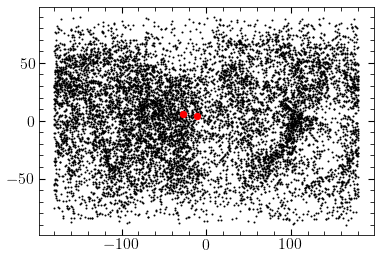

In [30]:
plt.scatter(l[~np.isnan(b)][d_cut1][dark_subhalos1], b[~np.isnan(b)][d_cut1][dark_subhalos1], s=1, c='k')
plt.scatter(np.mean(l[~np.isnan(b)][d_cut1][dark_subhalos1]), 
            np.mean(b[~np.isnan(b)][d_cut1][dark_subhalos1]), s=40, c='r')

plt.scatter(np.median(l[~np.isnan(b)][d_cut1][dark_subhalos1]), 
            np.median(b[~np.isnan(b)][d_cut1][dark_subhalos1]), s=40, c='r')

In [31]:
lmean = np.zeros(300)
bmean = np.zeros(300)
lmedian = np.zeros(300)
bmedian = np.zeros(300)

In [33]:
for k in range(300, 600):   
    m12_subhalos = halo.io.IO.read_catalogs('snapshot', k, sim_directory)
    l, b, pos = compute_subhalos_OP(k, m12_subhalos, sim_directory)
    dist = np.sqrt(np.sum(pos[~np.isnan(l)]**2, axis=1))
    d_cut1 = np.where((dist > 50) &  (dist < 300))
    d_cut2 = np.where((dist > 300) &  (dist < 600))
    dark_subhalos1 = m12_subhalos['star.mass'][d_cut1]==-1
    stellar_subhalos1 = m12_subhalos['star.mass'][d_cut1]!=-1
    
    dark_subhalos2 = m12_subhalos['star.mass'][d_cut2]==-1
    stellar_subhalos2 = m12_subhalos['star.mass'][d_cut2]!=-1
    
    lmean[k-300] = np.mean(l[~np.isnan(b)][d_cut1][dark_subhalos1])
    bmean[k-300] = np.mean(b[~np.isnan(b)][d_cut1][dark_subhalos1])
    lmedian[k-300] = np.median(l[~np.isnan(b)][d_cut1][dark_subhalos1])
    bmedian[k-300] = np.median(b[~np.isnan(b)][d_cut1][dark_subhalos1])
    
    


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 51054 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 51054 halos, 96 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (

  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 304, redshift = 0.842

* read 50748 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_304.hdf5

# in halo_analysis.halo_io.Particle():
* read 50748 halos, 98 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_304.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 312, redshift = 0.799

* read 50036 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_312.hdf5

# in halo_analysis.halo_io.Particle():
* read 50036 halos, 85 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_312.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 316, redshift = 0.779

* read 49992 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_316.hdf5

# in halo_analysis.halo_io.Particle():
* read 49992 halos, 85 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_316.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 320, redshift = 0.759

* read 49777 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_320.hdf5

# in halo_analysis.halo_io.Particle():
* read 49777 halos, 96 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_320.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 324, redshift = 0.740

* read 49549 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_324.hdf5

# in halo_analysis.halo_io.Particle():
* read 49549 halos, 78 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_324.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 328, redshift = 0.721

* read 49379 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_328.hdf5

# in halo_analysis.halo_io.Particle():
* read 49379 halos, 84 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_328.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 332, redshift = 0.702

* read 49068 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_332.hdf5

# in halo_analysis.halo_io.Particle():
* read 49068 halos, 77 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_332.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 336, redshift = 0.684

* read 48846 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_336.hdf5

# in halo_analysis.halo_io.Particle():
* read 48846 halos, 80 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_336.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 340, redshift = 0.666

* read 48487 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_340.hdf5

# in halo_analysis.halo_io.Particle():
* read 48487 halos, 79 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_340.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 344, redshift = 0.648

* read 48617 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_344.hdf5

# in halo_analysis.halo_io.Particle():
* read 48617 halos, 81 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_344.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 348, redshift = 0.631

* read 48358 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_348.hdf5

# in halo_analysis.halo_io.Particle():
* read 48358 halos, 74 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_348.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 352, redshift = 0.614

* read 48166 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_352.hdf5

# in halo_analysis.halo_io.Particle():
* read 48166 halos, 84 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_352.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 356, redshift = 0.598

* read 47865 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_356.hdf5

# in halo_analysis.halo_io.Particle():
* read 47865 halos, 75 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_356.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 360, redshift = 0.582

* read 47580 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_360.hdf5

# in halo_analysis.halo_io.Particle():
* read 47580 halos, 83 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_360.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 364, redshift = 0.566

* read 47505 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_364.hdf5

# in halo_analysis.halo_io.Particle():
* read 47505 halos, 71 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_364.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 368, redshift = 0.551

* read 47301 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_368.hdf5

# in halo_analysis.halo_io.Particle():
* read 47301 halos, 76 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_368.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 372, redshift = 0.535

* read 46968 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_372.hdf5

# in halo_analysis.halo_io.Particle():
* read 46968 halos, 69 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_372.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 376, redshift = 0.521

* read 46713 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_376.hdf5

# in halo_analysis.halo_io.Particle():
* read 46713 halos, 66 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_376.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 380, redshift = 0.506

* read 46789 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_380.hdf5

# in halo_analysis.halo_io.Particle():
* read 46789 halos, 67 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_380.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 384, redshift = 0.492

* read 46508 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_384.hdf5

# in halo_analysis.halo_io.Particle():
* read 46508 halos, 65 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_384.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 388, redshift = 0.478

* read 46211 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_388.hdf5

# in halo_analysis.halo_io.Particle():
* read 46211 halos, 64 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_388.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 392, redshift = 0.464

* read 46126 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_392.hdf5

# in halo_analysis.halo_io.Particle():
* read 46126 halos, 68 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_392.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 396, redshift = 0.450

* read 45688 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_396.hdf5

# in halo_analysis.halo_io.Particle():
* read 45688 halos, 60 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_396.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 400, redshift = 0.437

* read 45502 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_400.hdf5

# in halo_analysis.halo_io.Particle():
* read 45502 halos, 70 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_400.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 404, redshift = 0.424

* read 45375 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_404.hdf5

# in halo_analysis.halo_io.Particle():
* read 45375 halos, 61 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_404.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 408, redshift = 0.411

* read 45187 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_408.hdf5

# in halo_analysis.halo_io.Particle():
* read 45187 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_408.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 412, redshift = 0.399

* read 45166 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_412.hdf5

# in halo_analysis.halo_io.Particle():
* read 45166 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_412.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 416, redshift = 0.386

* read 44936 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_416.hdf5

# in halo_analysis.halo_io.Particle():
* read 44936 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_416.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 420, redshift = 0.374

* read 44612 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_420.hdf5

# in halo_analysis.halo_io.Particle():
* read 44612 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_420.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 424, redshift = 0.362

* read 44601 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_424.hdf5

# in halo_analysis.halo_io.Particle():
* read 44601 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_424.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 428, redshift = 0.351

* read 44405 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_428.hdf5

# in halo_analysis.halo_io.Particle():
* read 44405 halos, 63 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_428.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 432, redshift = 0.339

* read 44137 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_432.hdf5

# in halo_analysis.halo_io.Particle():
* read 44137 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_432.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 436, redshift = 0.328

* read 43875 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_436.hdf5

# in halo_analysis.halo_io.Particle():
* read 43875 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_436.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 440, redshift = 0.317

* read 43754 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_440.hdf5

# in halo_analysis.halo_io.Particle():
* read 43754 halos, 62 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_440.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 444, redshift = 0.306

* read 44160 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_444.hdf5

# in halo_analysis.halo_io.Particle():
* read 44160 halos, 59 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_444.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 448, redshift = 0.295

* read 43903 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_448.hdf5

# in halo_analysis.halo_io.Particle():
* read 43903 halos, 66 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_448.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 452, redshift = 0.284

* read 43652 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_452.hdf5

# in halo_analysis.halo_io.Particle():
* read 43652 halos, 66 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_452.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 456, redshift = 0.274

* read 43563 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_456.hdf5

# in halo_analysis.halo_io.Particle():
* read 43563 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_456.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 460, redshift = 0.264

* read 43223 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_460.hdf5

# in halo_analysis.halo_io.Particle():
* read 43223 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_460.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 464, redshift = 0.253

* read 42990 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_464.hdf5

# in halo_analysis.halo_io.Particle():
* read 42990 halos, 56 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_464.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 468, redshift = 0.244

* read 43053 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_468.hdf5

# in halo_analysis.halo_io.Particle():
* read 43053 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_468.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 472, redshift = 0.234

* read 42858 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_472.hdf5

# in halo_analysis.halo_io.Particle():
* read 42858 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_472.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 476, redshift = 0.224

* read 42675 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_476.hdf5

# in halo_analysis.halo_io.Particle():
* read 42675 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_476.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 480, redshift = 0.215

* read 42487 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_480.hdf5

# in halo_analysis.halo_io.Particle():
* read 42487 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_480.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 484, redshift = 0.205

* read 42378 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_484.hdf5

# in halo_analysis.halo_io.Particle():
* read 42378 halos, 61 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_484.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 488, redshift = 0.196

* read 42315 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_488.hdf5

# in halo_analysis.halo_io.Particle():
* read 42315 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_488.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 492, redshift = 0.187

* read 42154 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_492.hdf5

# in halo_analysis.halo_io.Particle():
* read 42154 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_492.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 496, redshift = 0.178

* read 42001 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_496.hdf5

# in halo_analysis.halo_io.Particle():
* read 42001 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_496.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 500, redshift = 0.169

* read 41869 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_500.hdf5

# in halo_analysis.halo_io.Particle():
* read 41869 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_500.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 504, redshift = 0.161

* read 41727 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_504.hdf5

# in halo_analysis.halo_io.Particle():
* read 41727 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_504.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 508, redshift = 0.152

* read 41620 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_508.hdf5

# in halo_analysis.halo_io.Particle():
* read 41620 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_508.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 512, redshift = 0.144

* read 41574 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_512.hdf5

# in halo_analysis.halo_io.Particle():
* read 41574 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_512.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 516, redshift = 0.136

* read 41458 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_516.hdf5

# in halo_analysis.halo_io.Particle():
* read 41458 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_516.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 520, redshift = 0.127

* read 41310 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_520.hdf5

# in halo_analysis.halo_io.Particle():
* read 41310 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_520.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 524, redshift = 0.119

* read 41185 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_524.hdf5

# in halo_analysis.halo_io.Particle():
* read 41185 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_524.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 528, redshift = 0.112

* read 41006 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_528.hdf5

# in halo_analysis.halo_io.Particle():
* read 41006 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_528.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 532, redshift = 0.104

* read 40898 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_532.hdf5

# in halo_analysis.halo_io.Particle():
* read 40898 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_532.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 536, redshift = 0.096

* read 40797 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_536.hdf5

# in halo_analysis.halo_io.Particle():
* read 40797 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_536.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 540, redshift = 0.088

* read 40776 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_540.hdf5

# in halo_analysis.halo_io.Particle():
* read 40776 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_540.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 544, redshift = 0.081

* read 40659 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_544.hdf5

# in halo_analysis.halo_io.Particle():
* read 40659 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_544.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 548, redshift = 0.074

* read 40393 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_548.hdf5

# in halo_analysis.halo_io.Particle():
* read 40393 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_548.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 552, redshift = 0.066

* read 40321 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_552.hdf5

# in halo_analysis.halo_io.Particle():
* read 40321 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_552.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 556, redshift = 0.059

* read 40265 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_556.hdf5

# in halo_analysis.halo_io.Particle():
* read 40265 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_556.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 560, redshift = 0.052

* read 40240 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_560.hdf5

# in halo_analysis.halo_io.Particle():
* read 40240 halos, 52 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_560.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 564, redshift = 0.045

* read 40146 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_564.hdf5

# in halo_analysis.halo_io.Particle():
* read 40146 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_564.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 568, redshift = 0.038

* read 40153 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_568.hdf5

# in halo_analysis.halo_io.Particle():
* read 40153 halos, 48 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_568.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 572, redshift = 0.031

* read 40069 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_572.hdf5

# in halo_analysis.halo_io.Particle():
* read 40069 halos, 49 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_572.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 576, redshift = 0.024

* read 39796 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_576.hdf5

# in halo_analysis.halo_io.Particle():
* read 39796 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_576.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 580, redshift = 0.018

* read 39790 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_580.hdf5

# in halo_analysis.halo_io.Particle():
* read 39790 halos, 53 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_580.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 584, redshift = 0.011

* read 39749 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_584.hdf5

# in halo_analysis.halo_io.Particle():
* read 39749 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_584.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 588, redshift = 0.005

* read 39735 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_588.hdf5

# in halo_analysis.halo_io.Particle():
* read 39735 halos, 50 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_588.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 592, redshift = 0.001

* read 39492 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_592.hdf5

# in halo_analysis.halo_io.Particle():
* read 39492 halos, 54 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_592.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 596, redshift = 0.001

* read 39616 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_596.hdf5

# in halo_analysis.halo_io.Particle():
* read 39616 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_596.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header f

  host1 position = (40162.97, 41962.27, 40350.82) [kpc comoving]
  host1 velocity = (-113.9, -29.3, -122.8) [km / s]
  host1 axis ratios = (0.56, 0.61, 0.93)

* Building halo with 74537000 and 8052512 particles


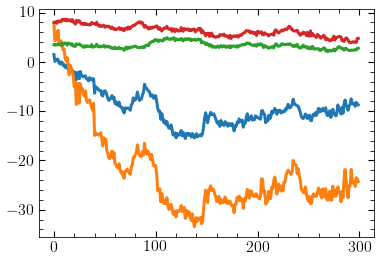

In [37]:
plt.plot(lmean)
plt.plot(lmedian)

plt.plot(bmean)
plt.plot(bmedian)